集成学习的目标是将不同的学习器组合形成一个元学习器(meta-learner),该元学习器比每个单独的学习器具有更好的泛化性能。如下图，展示了包含有10个分类器的多数投票法集成学习。

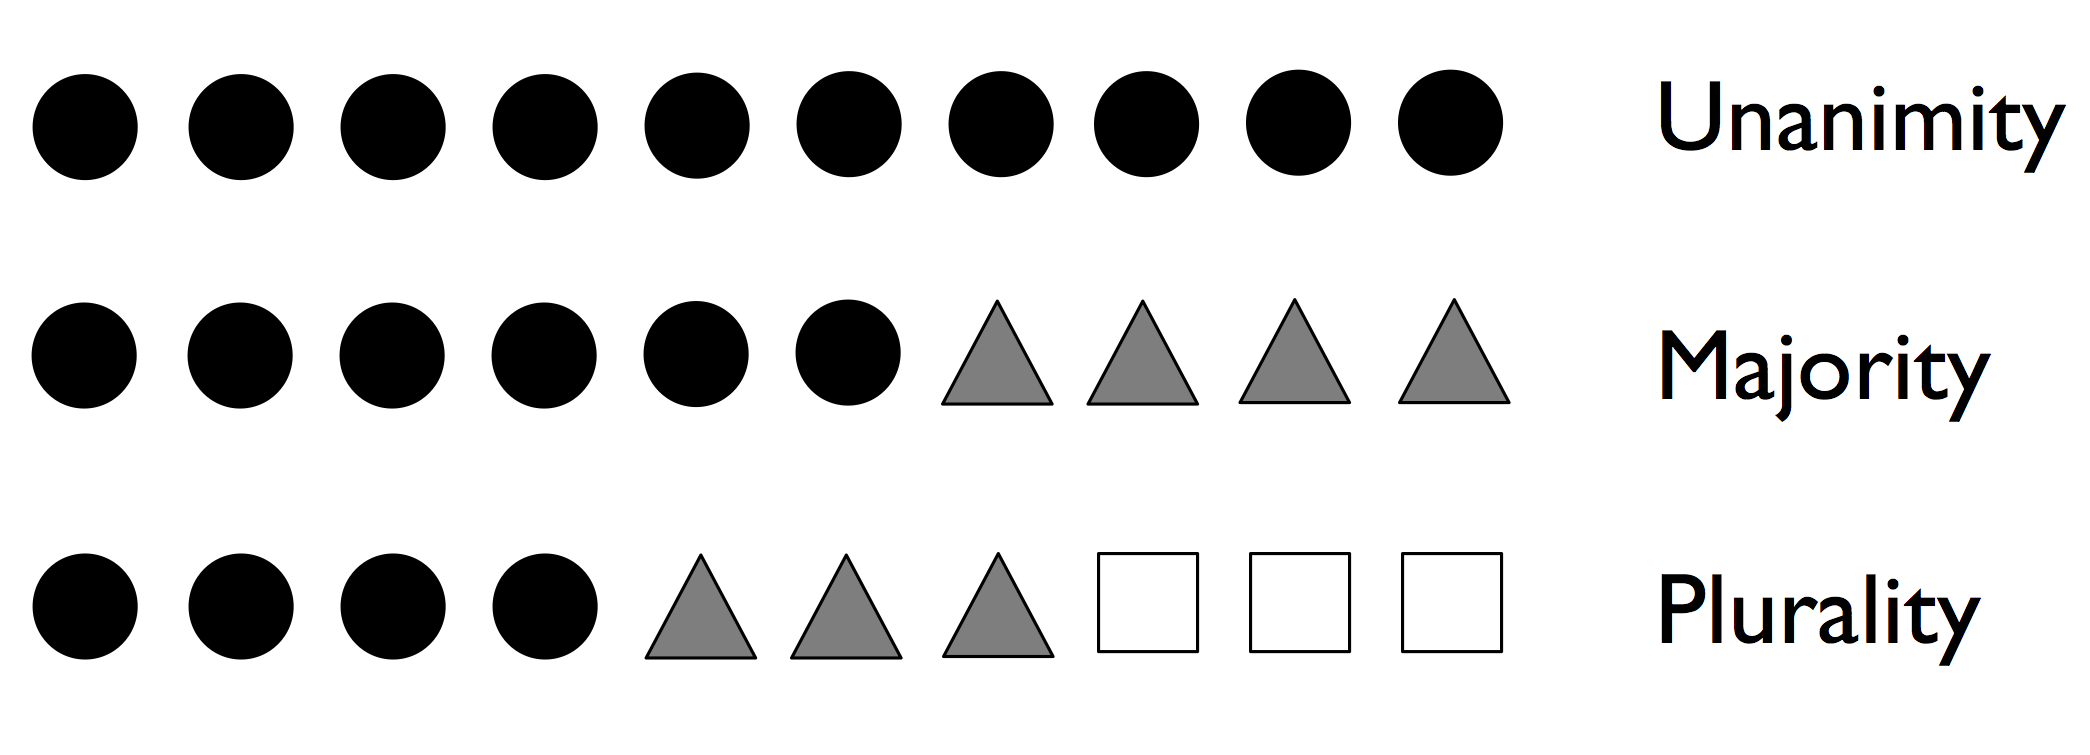

In [1]:
from IPython.display import Image

Image(filename='../Python-MachineLearning/Attached_images/Chapter7/figures/07_01.png', 
      width=450)

在上图中，可以看到有两个都代表多数的情况，"Majority"和"Plurality". 根据作者的注释，"In the UK, people distinguish between majority and plurality voting via the terms 'absolute' and 'relative' respectively." 也就是说，前者为绝对多数，后者为相对多数.

通常提到的多数投票集成方法如下图所示：

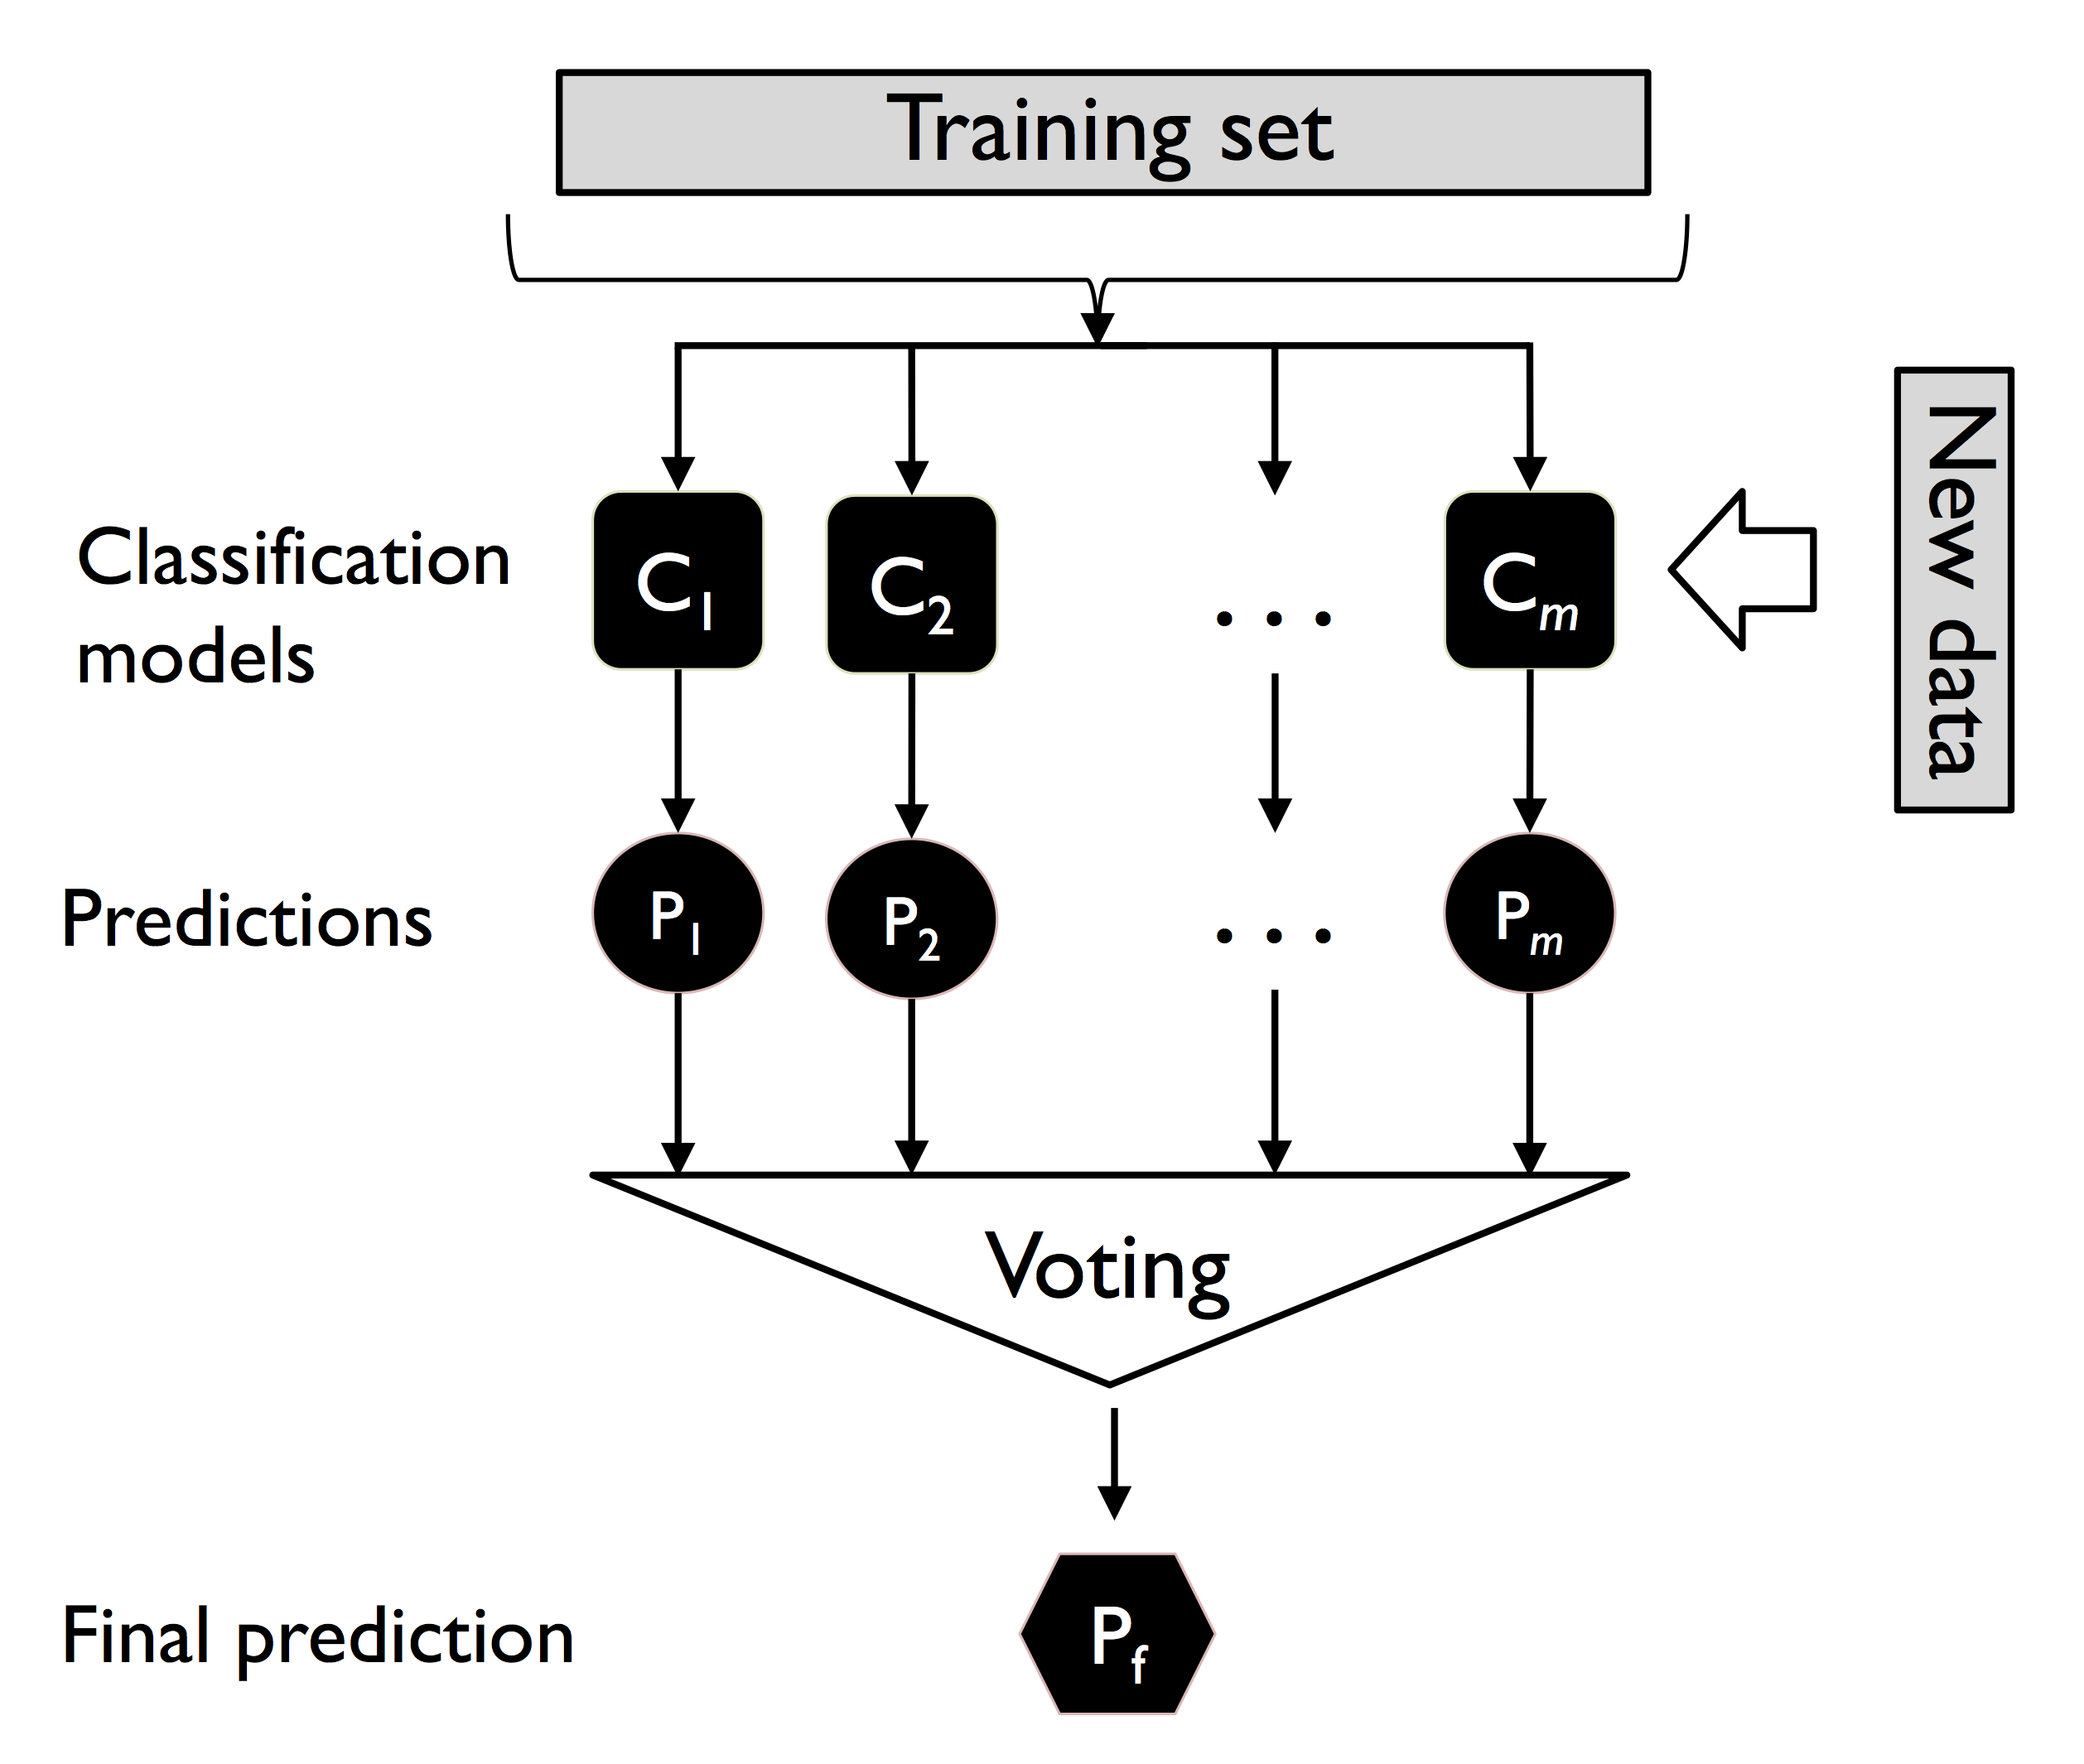

In [2]:
Image(filename='../Python-MachineLearning/Attached_images/Chapter7/figures/07_02.png', 
      width=450)

此时，对于单个的分类器$C_j$，利用多数投票法得到的预测标签$\hat{y}$可记录如下：

$$\hat{y}=\mathrm{mode}\{C_1(\boldsymbol{x}),C_2(\boldsymbol{x}),...,C_m(\boldsymbol{x})\}$$

在统计学中，`mode`代表的是一个集合中最频繁的事件或者结果。例如$\mathrm{mode}\{1,2,1,1,2,4,5,4\}=1$.

例如，在一个二分类任务中，class1= -1, class2= +1, 此时通过多数投票法集成学习预测过程如下：

$$C(\boldsymbol{x})=\operatorname{sign}\left[\sum_j^mC_j(\boldsymbol{x})\right]=
\begin{cases}
1&\text{if}\quad \sum_jC_j(\boldsymbol{x})\geq0\\
-1&\text{otherwise}
\end{cases}$$

在上式中，$\sum_jC_j(\boldsymbol{x})\geq0$就意味着个体分类器预测为+1的数量至少比预测为-1的数量多一个.

#### 假设说明

为说明集成方法为什么优于单独的学习器，这里做如下假设：

* 假设1：二分类任务的所有$n$个基分类器都具有相同的错误率$\varepsilon$;
* 假设2：所有的分类器彼此独立，且错误率不相关.

在上述假设下，可以将集成(ensemble)分类器的错误概率表示为如下概率质量函数(probability mass function):

$$
P(y\geq k)=\sum_k^n\binom{n}{k}\varepsilon^k(1-\varepsilon)^{n-k}=\varepsilon_\text{ensemble}
$$

在上式中，$y$是一个随机变量，$P(y\geq k)$表示至少有$k$个基学习器预测错误的概率，$\binom{n}{k}$是一个组合数，表示$n\quad choose \quad k$，也就是$n$个里面选$k$个.

示例，如果$n=11$, $\varepsilon=0.25$,则计算如下：

$$P(y\geq k)=\sum_{k=6}^{11}\binom{11}{k}0.25^k(1-0.25)^{11-k}=0.034$$

上述计算过程的Python实现如下：

In [1]:
import math

# 定义计算组合数的函数.
def combination(n, k):
    return math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

# 定义计算概率的函数.
def calculate_probability(n, k, p):
    total_probability = 0
    for i in range(k, n + 1):
        total_probability += combination(n, i) * (p ** i) * ((1 - p) ** (n - i))
    return total_probability

# 给定的参数.
n = 11  # 基学习器的总数.
k = 6   # 基学习器数量.
p = 0.25  # 单个基学习器预测错误的概率.

# 计算集成模型错误概率.
probability = calculate_probability(n, k, p)
print(f"P(y >= {k}) = {probability}")

P(y >= 6) = 0.03432750701904297
